# Chapter: 7
## Section: Fairness assessment and improvement in Python

In [ ]:
!pip install 'aif360'
!pip install shap

This code is adapted from https://github.com/Trusted-AI/AIF360/blob/master/examples/sklearn/monthly_bee_datasets_metrics.ipynb

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost
import shap
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from aif360.sklearn.metrics import disparate_impact_ratio, average_odds_error

# loading UCI adult income dataset
# classification task to predict if people made over $50k in the 90s or not
X,y = shap.datasets.adult()
# split the data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state=42)
# making a dataframe out of y values with "Sex" being their indices
y_train = pd.DataFrame({'label': y_train}, index = X_train['Sex'])
y_test = pd.DataFrame({'label': y_test}, index = X_test['Sex'])

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [3]:
# initializing a XGboost model
xgb_model = xgboost.XGBClassifier(random_state=42)
# fitting the XGboost model with training data
xgb_model.fit(X_train, y_train)
# calculating roc-auc of predictions
print("ROC-AUC of predictions: {}".format(roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])))
# generating predictions for the test set
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

ROC-AUC of predictions: 0.9245519211494841


In [4]:
di_train_orig = disparate_impact_ratio(y_train, prot_attr='Sex', priv_group=1, pos_label=True)
di_test_orig = disparate_impact_ratio(y_test, prot_attr='Sex', priv_group=1, pos_label=True)
di_train = disparate_impact_ratio(y_train, y_pred_train, prot_attr='Sex', priv_group=1, pos_label=True)
di_test = disparate_impact_ratio(y_test, y_pred_test, prot_attr='Sex', priv_group=1, pos_label=True)

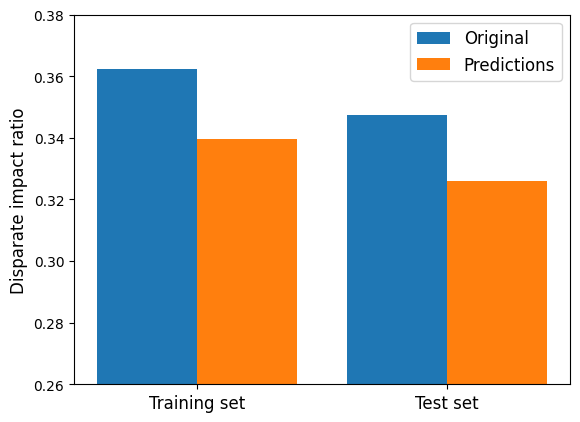

In [5]:
plt.bar(np.arange(2)-0.2, [di_train_orig, di_test_orig], width=0.4)
plt.bar(np.arange(2)+0.2, [di_train, di_test],  width=0.4)
plt.ylim(0.26, 0.38)
plt.ylabel('Disparate impact ratio', fontsize = 12)
plt.xticks(np.arange(2), ["Training set", "Test set"],fontsize = 12)
plt.legend(["Original", "Predictions"], fontsize=12)
plt.show()